This is a really simple notebook just exploring what the data looks like

In [16]:
# Imports
import glob
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
# Where the data downloaded from Kaggle sits
data_dir = '../data'

In [5]:
# Get training files
files = glob.glob(os.path.join(data_dir,"training","*.json"))
files[0:10]

['../data/training/d0f5fe59.json',
 '../data/training/2013d3e2.json',
 '../data/training/f35d900a.json',
 '../data/training/aba27056.json',
 '../data/training/23b5c85d.json',
 '../data/training/d06dbe63.json',
 '../data/training/6d0aefbc.json',
 '../data/training/bd4472b8.json',
 '../data/training/d22278a0.json',
 '../data/training/7468f01a.json']

Let's load in one of the json files. 

From the competition site (https://www.kaggle.com/c/abstraction-and-reasoning-challenge/data): 

    Each task JSON file contains a dictionary with two fields:

    "train": demonstration input/output pairs. It is a list of "pairs" (typically 3 pairs).
    "test": test input/output pairs. It is a list of "pairs" (typically 1 pair).
    A "pair" is a dictionary with two fields: - "input": the input "grid" for the pair. - "output": the output "grid" for the pair.

    A "grid" is a rectangular matrix (list of lists) of integers between 0 and 9 (inclusive). The smallest possible grid size is 1x1 and the largest is 30x30.

In [6]:
# load in one file to explore
with open(files[0], 'r') as f:
    task = json.load(f)
task

{'train': [{'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 8, 8, 0, 0, 0, 0, 0, 0],
    [0, 0, 8, 8, 0, 0, 0, 0, 0, 0],
    [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
    [0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 8, 8, 0, 0, 0],
    [0, 0, 0, 0, 8, 8, 8, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 8, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 8, 8, 0, 0, 0, 0, 0],
    [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 8, 0, 0, 0, 8, 8, 0],
    [0, 0, 0, 0, 0, 0, 0, 8, 8, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
   'output': [[8, 0, 0, 0], [0, 8, 0, 0], [0, 0, 8, 0], [0, 0, 0, 8]]},
  {'input': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 8, 8, 0, 0, 0, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 8, 8, 8, 8, 0, 0, 0],
    [0, 0, 0, 0, 0, 8, 0, 8, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0

In [22]:
np.task['train'][0]['input']

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 8, 8, 0, 0, 0, 0, 0, 0],
 [0, 0, 8, 8, 0, 0, 0, 0, 0, 0],
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
 [0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 8, 8, 0, 0, 0],
 [0, 0, 0, 0, 8, 8, 8, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 8, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 8, 8, 0, 0, 0, 0, 0],
 [0, 8, 8, 8, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 8, 0, 0, 0, 8, 8, 0],
 [0, 0, 0, 0, 0, 0, 0, 8, 8, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [8]:
# Let's take a look at some of the shapes
for phase_key in task:
    for grid_pair in task[phase_key]: # list of input/output pairs
        input_grid_shape = np.array(grid_pair['input']).shape
        output_grid_shape = np.array(grid_pair['input']).shape
        print('For phase {}  - input shape: {}, output shape: {}'.format(
            phase_key,input_grid_shape,output_grid_shape)
        )

For phase train  - input shape: (16, 10), output shape: (16, 10)
For phase train  - input shape: (12, 12), output shape: (12, 12)
For phase train  - input shape: (8, 12), output shape: (8, 12)
For phase test  - input shape: (15, 12), output shape: (15, 12)


The below exploration is taken directly from https://www.kaggle.com/tarunpaparaju/arc-competition-eda-pytorch-cnn

In [11]:
# Get all training jsons
train_tasks = []
for task_file in files:
    with open(task_file, 'r') as f:
        task = json.load(f)
        train_tasks.append(task)

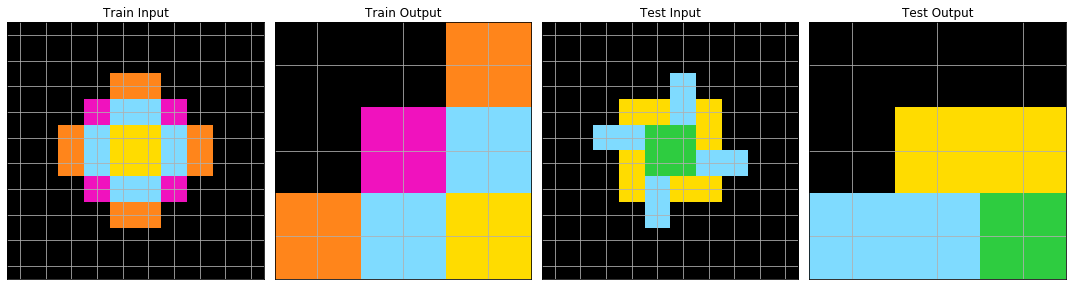

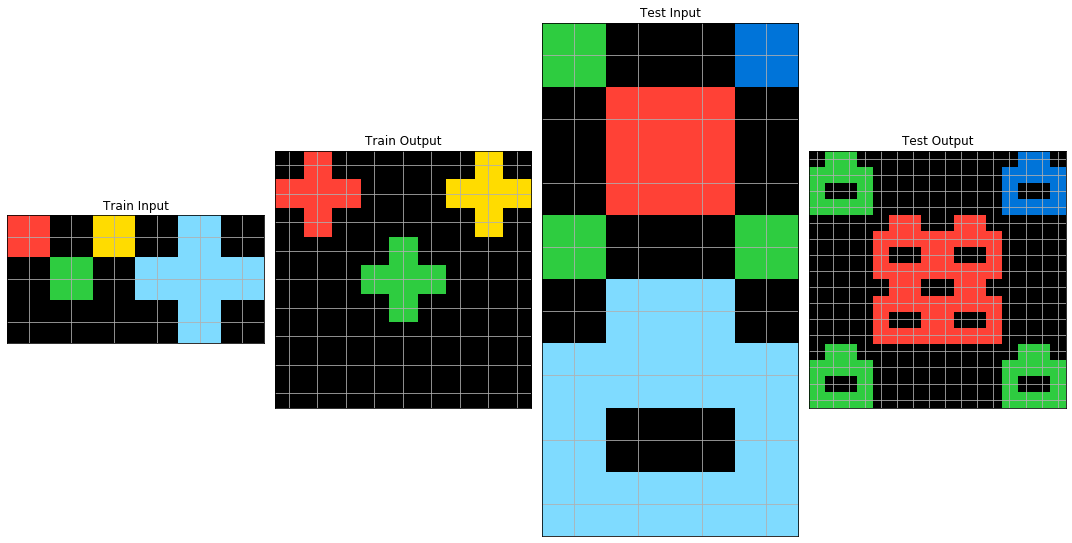

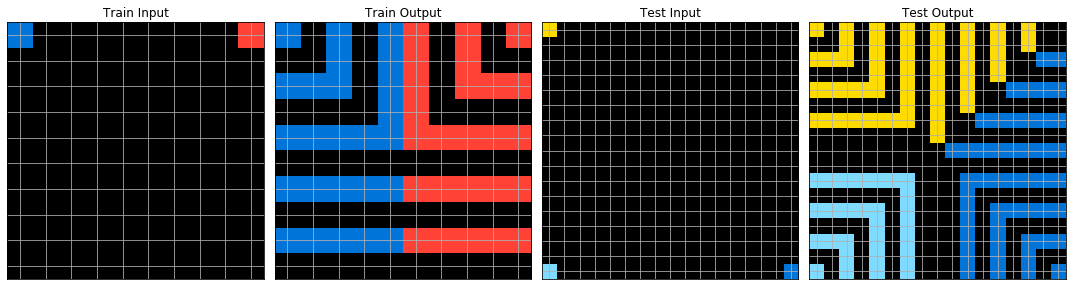

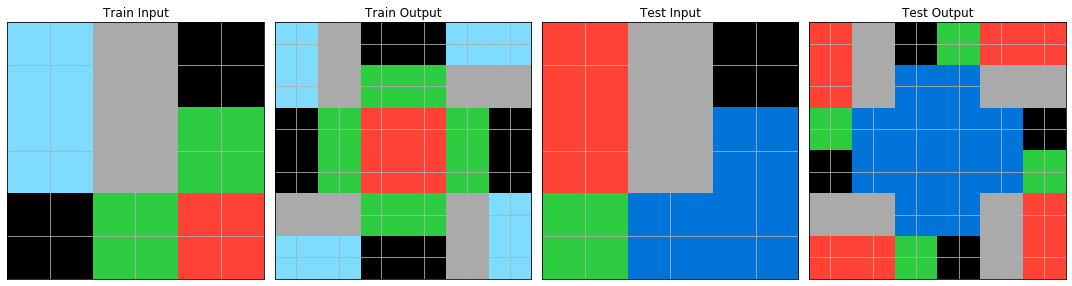

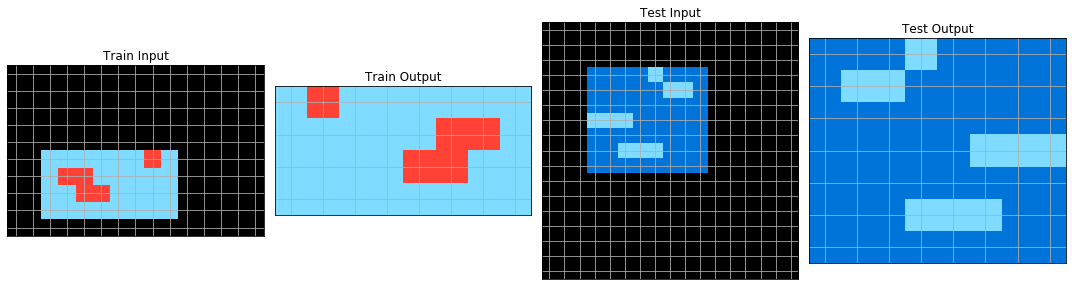

In [18]:
for i in [1, 19, 8, 15, 9]:

    task = train_tasks[i]

    def plot_task(task):
        """
        Plots the first train and test pairs of a specified task,
        using same color scheme as the ARC app
        """
        cmap = colors.ListedColormap(
            ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
             '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
        norm = colors.Normalize(vmin=0, vmax=9)
        fig, ax = plt.subplots(1, 4, figsize=(15,15))
        ax[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['input'])[1]
        height = np.shape(task['train'][0]['input'])[0]
        ax[0].set_xticks(np.arange(0,width))
        ax[0].set_yticks(np.arange(0,height))
        ax[0].set_xticklabels([])
        ax[0].set_yticklabels([])
        ax[0].tick_params(length=0)
        ax[0].grid(True)
        ax[0].set_title('Train Input')
        ax[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['train'][0]['output'])[1]
        height = np.shape(task['train'][0]['output'])[0]
        ax[1].set_xticks(np.arange(0,width))
        ax[1].set_yticks(np.arange(0,height))
        ax[1].set_xticklabels([])
        ax[1].set_yticklabels([])
        ax[1].tick_params(length=0)
        ax[1].grid(True)
        ax[1].set_title('Train Output')
        ax[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['input'])[1]
        height = np.shape(task['test'][0]['input'])[0]
        ax[2].set_xticks(np.arange(0,width))
        ax[2].set_yticks(np.arange(0,height))
        ax[2].set_xticklabels([])
        ax[2].set_yticklabels([])
        ax[2].tick_params(length=0)
        ax[2].grid(True)
        ax[2].set_title('Test Input')
        ax[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
        width = np.shape(task['test'][0]['output'])[1]
        height = np.shape(task['test'][0]['output'])[0]
        ax[3].set_xticks(np.arange(0,width))
        ax[3].set_yticks(np.arange(0,height))
        ax[3].set_xticklabels([])
        ax[3].set_yticklabels([])
        ax[3].tick_params(length=0)
        ax[3].grid(True)
        ax[3].set_title('Test Output')
        plt.tight_layout()
        plt.show()

    plot_task(task)